In [1]:
import pandas as pd
import glob
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline 


# Seaborn visualization library
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier

import scipy

In [2]:
pd.set_option('display.max_columns', 1000)
pd.options.display.max_rows=1000

pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

plt.rcParams.update({'figure.max_open_warning': 0})


In [3]:
import random
random.seed( 0 )

# Load in Data

In [114]:
print(['qxactivitiesxrecency_'+str(1+x) for x in range(24)])

['qxactivitiesxrecency_1', 'qxactivitiesxrecency_2', 'qxactivitiesxrecency_3', 'qxactivitiesxrecency_4', 'qxactivitiesxrecency_5', 'qxactivitiesxrecency_6', 'qxactivitiesxrecency_7', 'qxactivitiesxrecency_8', 'qxactivitiesxrecency_9', 'qxactivitiesxrecency_10', 'qxactivitiesxrecency_11', 'qxactivitiesxrecency_12', 'qxactivitiesxrecency_13', 'qxactivitiesxrecency_14', 'qxactivitiesxrecency_15', 'qxactivitiesxrecency_16', 'qxactivitiesxrecency_17', 'qxactivitiesxrecency_18', 'qxactivitiesxrecency_19', 'qxactivitiesxrecency_20', 'qxactivitiesxrecency_21', 'qxactivitiesxrecency_22', 'qxactivitiesxrecency_23', 'qxactivitiesxrecency_24']


In [113]:
print(['qxpreviousxmodel_'+str(1+x) for x in range(20)])

['qxpreviousxmodel_1', 'qxpreviousxmodel_2', 'qxpreviousxmodel_3', 'qxpreviousxmodel_4', 'qxpreviousxmodel_5', 'qxpreviousxmodel_6', 'qxpreviousxmodel_7', 'qxpreviousxmodel_8', 'qxpreviousxmodel_9', 'qxpreviousxmodel_10', 'qxpreviousxmodel_11', 'qxpreviousxmodel_12', 'qxpreviousxmodel_13', 'qxpreviousxmodel_14', 'qxpreviousxmodel_15', 'qxpreviousxmodel_16', 'qxpreviousxmodel_17', 'qxpreviousxmodel_18', 'qxpreviousxmodel_19', 'qxpreviousxmodel_20']


In [4]:
root = r"../data/input/07 Samsung UX Index - Web App Implementation/"

fname_data = root + r"Samsung UX Index Survey_Data.csv"
df_data = pd.read_csv(fname_data)

fname_vaxmap = root + r"Samsung UX Index Survey_Datamap.xlsx"
df_varmap = pd.read_excel(fname_vaxmap, header=1, sheet_name=0)
df_valmap = pd.read_excel(fname_vaxmap, header=1, sheet_name=1)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1218) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Examine Explained var Results

In [119]:
path = r'/Users/lubagloukhov/Documents/Consulting/Samsung/UXi/data/output'
all_files = glob.glob(path + "/*/latvar1_expvar.csv")

li = []
for filename in all_files:
    lines = open(filename).read().splitlines()
    df = pd.DataFrame(lines).transpose()
    df['analysis'] = filename.split('/')[9].split('_')[-1]
    li.append(df)

df_expvar = pd.concat(li, axis=0, ignore_index=True)

pc_list = ['pc'+str(x+1) for x in range(4)]
df_expvar.columns = ['pc1', 'pc2', 'pc3', 'pc4','pc5', 'analysisloc']
df_expvar[['pc1', 'pc2', 'pc3', 'pc4','pc5']] = df_expvar[['pc1', 'pc2', 'pc3', 'pc4','pc5']].astype('float')
df_expvar = df_expvar.drop_duplicates()
# %age of variance explained
df_expvar["total_var"] = df_expvar[['pc1', 'pc2', 'pc3', 'pc4','pc5']].sum(axis=1, skipna=True)
df_expvar["pc1_expvar"] =  df_expvar['pc1']/df_expvar["total_var"]
df_expvar['pc1_rank'] = df_expvar["pc1_expvar"].rank(ascending=False)
print(df_expvar.shape)
df_expvar

ValueError: No objects to concatenate

In [120]:
df_expvar=df_expvar[df_expvar.analysisloc!='usagemetrics']

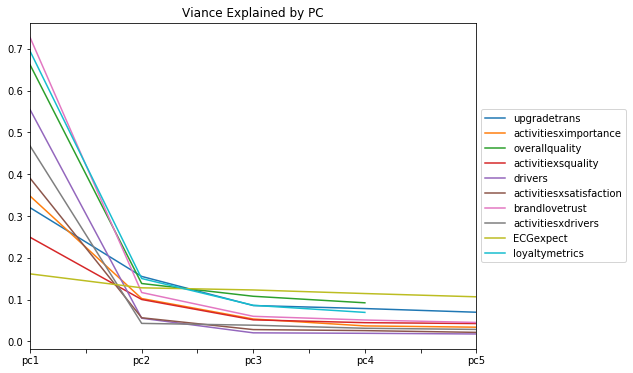

In [118]:
f = plt.figure()
plt.title('Viance Explained by PC', color='black')

df_expvar[['pc1', 'pc2', 'pc3', 'pc4','pc5', 'analysisloc']].set_index(
    'analysisloc').T.plot(kind='line', ax=f.gca(), figsize=(8,6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Examine Variable Weights

In [88]:
path = r'/Users/lubagloukhov/Documents/Consulting/Samsung/UXi/data/output'
all_files = glob.glob(path + "/*/pc1_comp.csv")

li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['analysis'] = filename.split('/')[9].split('_')[-1]
    li.append(df)

df_pc1wght = pd.concat(li, axis=0, ignore_index=True)

print(df_pc1wght.shape)
df_pc1wght


(812, 8)


,0,abs,Variable,Label,Short Label,sign,Variable_grp,analysis
0,-0.231265,0.231265,qxactivitiesximportance_10,Q_Activities_Importance. Setting up and managing notifications - How important is it for you that a smartphone performs well on the activities below?,notifications,-1.0,qxactivitiesximportance,activitiesximportance
1,-0.227517,0.227517,qxactivitiesximportance_8,"Q_Activities_Importance. Using your quick settings (e.g., toggle WiFi, Airplane mode, brightness, volume, flashlight) - How important is it for you that a smartphone performs well on the activities below?",quick settings,-1.0,qxactivitiesximportance,activitiesximportance
2,-0.225295,0.225295,qxactivitiesximportance_17,Q_Activities_Importance. Recording a video - How important is it for you that a smartphone performs well on the activities below?,video recording,-1.0,qxactivitiesximportance,activitiesximportance
3,-0.223360,0.223360,qxactivitiesximportance_9,"Q_Activities_Importance. Customizing settings (e.g., changing wallpaper, changing security/privacy requirements, etc.) - How important is it for you that a smartphone performs well on the activities below?",customizing settings,-1.0,qxactivitiesximportance,activitiesximportance
4,-0.222154,0.222154,qxactivitiesximportance_7,"Q_Activities_Importance. Organizing your home screen (moving apps, creating folders) - How important is it for you that a smartphone performs well on the activities below?",organizing home screen,-1.0,qxactivitiesximportance,activitiesximportance
5,-0.219331,0.219331,qxactivitiesximportance_18,Q_Activities_Importance. Editing a photo (in the gallery) - How important is it for you that a smartphone performs well on the activities below?,photo editing,-1.0,qxactivitiesximportance,activitiesximportance
6,-0.216674,0.216674,qxactivitiesximportance_19,Q_Activities_Importance. Sharing a photo or file - How important is it for you that a smartphone performs well on the activities below?,sharing,-1.0,qxactivitiesximportance,activitiesximportance
7,-0.215737,0.215737,qxactivitiesximportance_22,Q_Activities_Importance. Creating and editing a note - How important is it for you that a smartphone performs well on the activities below?,using notes,-1.0,qxactivitiesximportance,activitiesximportance
8,-0.211981,0.211981,qxactivitiesximportance_1,"Q_Activities_Importance. Using speaker phone (including all aspects of it, such as dialing, quality of sound, etc.) - How important is it for you that a smartphone performs well on the activities below?",speaker phone,-1.0,qxactivitiesximportance,activitiesximportance
9,-0.209182,0.209182,qxactivitiesximportance_12,Q_Activities_Importance. Scheduling a calendar event / setting reminders - How important is it for you that a smartphone performs well on the activities below?,calendar events and reminders,-1.0,qxactivitiesximportance,activitiesximportance


In [91]:

df_pc1wght_drivers = df_pc1wght[df_pc1wght.analysis=='drivers']
print(df_pc1wght_drivers.shape)
df_pc1wght_drivers

(34, 8)


,0,abs,Variable,Label,Short Label,sign,Variable_grp,analysis
54,-0.183732,0.183732,qxdrivers_11,Q_Drivers. Design and capabilities of my [MODEL] make me feel like my unique identity is respected - How much do you agree or disagree with the statements below?,Included / represented,-1.0,qxdrivers,drivers
55,-0.179949,0.179949,qxdrivers_14,"Q_Drivers. If my [MODEL] had its own personality, I would say it is likeable - How much do you agree or disagree with the statements below?",Personable / likeable,-1.0,qxdrivers,drivers
56,-0.179492,0.179492,qxdrivers_15,Q_Drivers. My [MODEL] helps me to express my true self - How much do you agree or disagree with the statements below?,Authentic / true,-1.0,qxdrivers,drivers
57,-0.179143,0.179143,qxdrivers_28,Q_Drivers. My [MODEL] understands me and is considerate of my individual needs and interests - How much do you agree or disagree with the statements below?,Compassionate / empathetic,-1.0,qxdrivers,drivers
58,-0.178643,0.178643,qxdrivers_33,Q_Drivers. Any task on my [MODEL] can be performed with as few taps as possible - How much do you agree or disagree with the statements below?,Efficient,-1.0,qxdrivers,drivers
59,-0.177765,0.177765,qxdrivers_23,"Q_Drivers. [MODEL] enables me to do what I want, how I want, and as much as I want to do with a smartphone - How much do you agree or disagree with the statements below?",Freeing,-1.0,qxdrivers,drivers
60,-0.177686,0.177686,qxdrivers_34,Q_Drivers. My [MODEL] is intelligent in its ability to answer my questions and help me solve problems - How much do you agree or disagree with the statements below?,Intelligent,-1.0,qxdrivers,drivers
61,-0.176840,0.176840,qxdrivers_7,Q_Drivers. My [MODEL]'s design and capabilities add real value to my life - How much do you agree or disagree with the statements below?,Meaningful,-1.0,qxdrivers,drivers
62,-0.176353,0.176353,qxdrivers_18,Q_Drivers. My [MODEL] has innovative capabilities and design that allow me to stand out from the crowd - How much do you agree or disagree with the statements below?,Innovative,-1.0,qxdrivers,drivers
63,-0.175858,0.175858,qxdrivers_19,Q_Drivers. My [MODEL] is fun to use - How much do you agree or disagree with the statements below?,Fun,-1.0,qxdrivers,drivers


In [92]:

df_pc1wght_brand = df_pc1wght[df_pc1wght.analysis=='brandlovetrust']
print(df_pc1wght_brand.shape)
df_pc1wght_brand

(5, 8)


,0,abs,Variable,Label,Short Label,sign,Variable_grp,analysis
670,-0.472720,0.472720,qxbrandxtrustxdrivers_4,"Q_Brand_Trust_Drivers. Honest - Based on your experience with [MODEL], how much do you agree or disagree that the following describes [BRAND].",Integrity / honest,-1.0,qxbrandxtrustxdrivers,brandlovetrust
671,-0.463116,0.463116,qxbrandxtrustxdrivers_2,"Q_Brand_Trust_Drivers. Ethical - Based on your experience with [MODEL], how much do you agree or disagree that the following describes [BRAND].",Ethical,-1.0,qxbrandxtrustxdrivers,brandlovetrust
672,-0.462437,0.462437,qxbrandxtrustxdrivers_3,"Q_Brand_Trust_Drivers. Respectful - Based on your experience with [MODEL], how much do you agree or disagree that the following describes [BRAND].",Respectful,-1.0,qxbrandxtrustxdrivers,brandlovetrust
673,-0.457231,0.457231,qxbrandxtrustxdrivers_1,"Q_Brand_Trust_Drivers. Transparent in its actions - Based on your experience with [MODEL], how much do you agree or disagree that the following describes [BRAND].",Transparent,-1.0,qxbrandxtrustxdrivers,brandlovetrust
674,-0.373029,0.373029,qxbrandxlove_1,Q_BrandxLove. How much do you agree or disagree with the statement below? - [BRAND] is a brand I love,brand love,-1.0,qxbrandxlove,brandlovetrust


In [93]:

df_pc1wght_loyalty = df_pc1wght[df_pc1wght.analysis=='loyaltymetrics']
print(df_pc1wght_loyalty.shape)
df_pc1wght_loyalty

(4, 8)


,0,abs,Variable,Label,Short Label,sign,Variable_grp,analysis
808,-0.525042,0.525042,qxadvocacy01_1,"Q_Advocacy01. How likely are you to recommend your [MODEL] or another [BRAND] smartphone to a family member, friend, or colleague looking to purchase a new smartphone?",advocacy - recommending,-1.0,qxadvocacy01,loyaltymetrics
809,-0.516093,0.516093,qxenrichment_1,"Q_Enrichment. Based on your experience with your [MODEL], how likely are you to consider [BRAND] products if you decide to buy a new tablet, a laptop, or any other electronic product produced by this brand?",enrichment,-1.0,qxenrichment,loyaltymetrics
810,-0.510670,0.510670,qxretention_1,Q_Retention. How likely are you to select [BRAND] the next time you decide to upgrade/purchase a new smartphone?,retention,-1.0,qxretention,loyaltymetrics
811,-0.444067,0.444067,qxadvocacy02_1,Q_Advocacy02. How likely are you to leave a positive online review for your [MODEL]?,advocacy - leaving a review,-1.0,qxadvocacy02,loyaltymetrics


In [95]:

df_pc1wght_overallquality = df_pc1wght[df_pc1wght.analysis=='overallquality']
print(df_pc1wght_overallquality.shape)
df_pc1wght_overallquality

(4, 8)


,0,abs,Variable,Label,Short Label,sign,Variable_grp,analysis
25,-0.522250,0.522250,qxoverallxqualityxindicators_2,"Q_Overall_Quality_Indicators. When I use my [MODEL] , I feel good/positive - How much do you agree or disagree with the following about your [MODEL]?",overall feeling,-1.0,qxoverallxqualityxindicators,overallquality
26,-0.511420,0.511420,qxoverallxqualityxindicators_3,Q_Overall_Quality_Indicators. My [MODEL] meets my needs/ performs well - How much do you agree or disagree with the following about your [MODEL]?,overall function,-1.0,qxoverallxqualityxindicators,overallquality
27,-0.497318,0.497318,qxoverallxqualityxindicators_4,Q_Overall_Quality_Indicators. My [MODEL] is simple/easy to use - How much do you agree or disagree with the following about your [MODEL]?,overall simplicity,-1.0,qxoverallxqualityxindicators,overallquality
28,-0.467310,0.467310,qxoverallxqualityxindicators_1,Q_Overall_Quality_Indicators. [Brand] is trustworthy - How much do you agree or disagree with the following about your [MODEL]?,overall trust,-1.0,qxoverallxqualityxindicators,overallquality


In [96]:

df_pc1wght_usagemetrics = df_pc1wght[df_pc1wght.analysis=='usagemetrics']
print(df_pc1wght_usagemetrics.shape)
df_pc1wght_usagemetrics

(7, 8)


,0,abs,Variable,Label,Short Label,sign,Variable_grp,analysis
801,0.671976,0.671976,qxcurrentxos,"Q_Current_OS. Which version of [SHOW IF BRAND=APPLE: iOS; SHOW IF BRAND = SAMSUNG, LG, MOTOROLA, GOOGLE: Android] are you currently using on your smartphone? If you are not sure, you can check this in your settings.",NaN,1.0,qxcurrentxos,usagemetrics
802,0.661342,0.661342,qxcurrentxstorage,"Q_Current_Storage. What is your [MODEL]’s storage capacity? Please specify the internal storage only, do not include the external storage on SD card.",NaN,1.0,qxcurrentxstorage,usagemetrics
803,0.260173,0.260173,qxunlocking,Q_Unlocking. Which method do you currently use to unlock your [MODEL]?,NaN,1.0,qxunlocking,usagemetrics
804,0.110686,0.110686,qxcurrentxcarrier,Q_Current_Carrier. Which mobile carrier do you use on your [MODEL]?,NaN,1.0,qxcurrentxcarrier,usagemetrics
805,-0.107072,0.107072,qxtime,Q_Time. How long have you been using your [MODEL]?,recency of use,-1.0,qxtime,usagemetrics
806,-0.106526,0.106526,qxtransition_1,"QxTransition_1. How easy was it to transfer settings, contacts and content (pictures, music, videos, etc.) from your old smartphone to the new one?",NaN,-1.0,qxtransition,usagemetrics
807,-0.091224,0.091224,qxpreviousxbrand,Q_Previous_Brand. Which smartphone brand did you use before [MODEL]?,NaN,-1.0,qxpreviousxbrand,usagemetrics


In [97]:

df_pc1wght_activitiesximportance = df_pc1wght[df_pc1wght.analysis=='activitiesximportance']
print(df_pc1wght_activitiesximportance.shape)
df_pc1wght_activitiesximportance

(25, 8)


,0,abs,Variable,Label,Short Label,sign,Variable_grp,analysis
0,-0.231265,0.231265,qxactivitiesximportance_10,Q_Activities_Importance. Setting up and managing notifications - How important is it for you that a smartphone performs well on the activities below?,notifications,-1.0,qxactivitiesximportance,activitiesximportance
1,-0.227517,0.227517,qxactivitiesximportance_8,"Q_Activities_Importance. Using your quick settings (e.g., toggle WiFi, Airplane mode, brightness, volume, flashlight) - How important is it for you that a smartphone performs well on the activities below?",quick settings,-1.0,qxactivitiesximportance,activitiesximportance
2,-0.225295,0.225295,qxactivitiesximportance_17,Q_Activities_Importance. Recording a video - How important is it for you that a smartphone performs well on the activities below?,video recording,-1.0,qxactivitiesximportance,activitiesximportance
3,-0.223360,0.223360,qxactivitiesximportance_9,"Q_Activities_Importance. Customizing settings (e.g., changing wallpaper, changing security/privacy requirements, etc.) - How important is it for you that a smartphone performs well on the activities below?",customizing settings,-1.0,qxactivitiesximportance,activitiesximportance
4,-0.222154,0.222154,qxactivitiesximportance_7,"Q_Activities_Importance. Organizing your home screen (moving apps, creating folders) - How important is it for you that a smartphone performs well on the activities below?",organizing home screen,-1.0,qxactivitiesximportance,activitiesximportance
5,-0.219331,0.219331,qxactivitiesximportance_18,Q_Activities_Importance. Editing a photo (in the gallery) - How important is it for you that a smartphone performs well on the activities below?,photo editing,-1.0,qxactivitiesximportance,activitiesximportance
6,-0.216674,0.216674,qxactivitiesximportance_19,Q_Activities_Importance. Sharing a photo or file - How important is it for you that a smartphone performs well on the activities below?,sharing,-1.0,qxactivitiesximportance,activitiesximportance
7,-0.215737,0.215737,qxactivitiesximportance_22,Q_Activities_Importance. Creating and editing a note - How important is it for you that a smartphone performs well on the activities below?,using notes,-1.0,qxactivitiesximportance,activitiesximportance
8,-0.211981,0.211981,qxactivitiesximportance_1,"Q_Activities_Importance. Using speaker phone (including all aspects of it, such as dialing, quality of sound, etc.) - How important is it for you that a smartphone performs well on the activities below?",speaker phone,-1.0,qxactivitiesximportance,activitiesximportance
9,-0.209182,0.209182,qxactivitiesximportance_12,Q_Activities_Importance. Scheduling a calendar event / setting reminders - How important is it for you that a smartphone performs well on the activities below?,calendar events and reminders,-1.0,qxactivitiesximportance,activitiesximportance


In [98]:

df_pc1wght_activitiexsquality = df_pc1wght[df_pc1wght.analysis=='activitiexsquality']
print(df_pc1wght_activitiexsquality.shape)
df_pc1wght_activitiexsquality

(25, 8)


,0,abs,Variable,Label,Short Label,sign,Variable_grp,analysis
29,0.252778,0.252778,qxactivitiesxrecency_17,"Q_Activities_Recency. Recording a video - When was the last time you did each of the following on your [MODEL]? Please think of your experience with the preinstalled manufacturer apps only, and don’t consider your experience with alternative apps that yo",video recording,1.0,qxactivitiesxrecency,activitiexsquality
30,0.244037,0.244037,qxactivitiesxrecency_10,"Q_Activities_Recency. Setting up and managing notifications - When was the last time you did each of the following on your [MODEL]? Please think of your experience with the preinstalled manufacturer apps only, and don’t consider your experience with alte",notifications,1.0,qxactivitiesxrecency,activitiexsquality
31,0.237052,0.237052,qxactivitiesxrecency_16,"Q_Activities_Recency. Taking a picture (selfie) with the front-facing camera - When was the last time you did each of the following on your [MODEL]? Please think of your experience with the preinstalled manufacturer apps only, and don’t consider your exp",front camera,1.0,qxactivitiesxrecency,activitiexsquality
32,0.236688,0.236688,qxactivitiesxrecency_7,"Q_Activities_Recency. Organizing your home screen (moving apps, creating folders) - When was the last time you did each of the following on your [MODEL]? Please think of your experience with the preinstalled manufacturer apps only, and don’t consider you",organizing home screen,1.0,qxactivitiesxrecency,activitiexsquality
33,0.233432,0.233432,qxactivitiesxrecency_18,"Q_Activities_Recency. Editing a photo (in the gallery) - When was the last time you did each of the following on your [MODEL]? Please think of your experience with the preinstalled manufacturer apps only, and don’t consider your experience with alternati",photo editing,1.0,qxactivitiesxrecency,activitiexsquality
34,0.232697,0.232697,qxactivitiesxrecency_9,"Q_Activities_Recency. Customizing settings (e.g., changing wallpaper, changing security/privacy requirements, etc.) - When was the last time you did each of the following on your [MODEL]? Please think of your experience with the preinstalled manufacturer a",customizing settings,1.0,qxactivitiesxrecency,activitiexsquality
35,0.231756,0.231756,qxactivitiesxrecency_15,"Q_Activities_Recency. Taking a picture with the rear-facing camera - When was the last time you did each of the following on your [MODEL]? Please think of your experience with the preinstalled manufacturer apps only, and don’t consider your experience wi",rear camera,1.0,qxactivitiesxrecency,activitiexsquality
36,0.205840,0.205840,qxactivitiesxrecency_11,"Q_Activities_Recency. Searching for something on your smartphone (from the home screen) - When was the last time you did each of the following on your [MODEL]? Please think of your experience with the preinstalled manufacturer apps only, and don’t consid",search phone,1.0,qxactivitiesxrecency,activitiexsquality
37,0.204349,0.204349,qxactivitiesxrecency_19,"Q_Activities_Recency. Sharing a photo or file - When was the last time you did each of the following on your [MODEL]? Please think of your experience with the preinstalled manufacturer apps only, and don’t consider your experience with alternative apps t",sharing,1.0,qxactivitiesxrecency,activitiexsquality
38,0.203457,0.203457,qxactivitiesxrecency_3,"Q_Activities_Recency. Transferring files from smartphone to a computer - When was the last time you did each of the following on your [MODEL]? Please think of your experience with the preinstalled manufacturer apps only, and don’t consider your experienc",transferring files,1.0,qxactivitiesxrecency,activitiexsquality


In [96]:

df_pc1wght_usagemetrics = df_pc1wght[df_pc1wght.analysis=='usagemetrics']

print(df_pc1wght_usagemetrics.shape)
df_pc1wght_usagemetrics

(7, 8)


,0,abs,Variable,Label,Short Label,sign,Variable_grp,analysis
801,0.671976,0.671976,qxcurrentxos,"Q_Current_OS. Which version of [SHOW IF BRAND=APPLE: iOS; SHOW IF BRAND = SAMSUNG, LG, MOTOROLA, GOOGLE: Android] are you currently using on your smartphone? If you are not sure, you can check this in your settings.",NaN,1.0,qxcurrentxos,usagemetrics
802,0.661342,0.661342,qxcurrentxstorage,"Q_Current_Storage. What is your [MODEL]’s storage capacity? Please specify the internal storage only, do not include the external storage on SD card.",NaN,1.0,qxcurrentxstorage,usagemetrics
803,0.260173,0.260173,qxunlocking,Q_Unlocking. Which method do you currently use to unlock your [MODEL]?,NaN,1.0,qxunlocking,usagemetrics
804,0.110686,0.110686,qxcurrentxcarrier,Q_Current_Carrier. Which mobile carrier do you use on your [MODEL]?,NaN,1.0,qxcurrentxcarrier,usagemetrics
805,-0.107072,0.107072,qxtime,Q_Time. How long have you been using your [MODEL]?,recency of use,-1.0,qxtime,usagemetrics
806,-0.106526,0.106526,qxtransition_1,"QxTransition_1. How easy was it to transfer settings, contacts and content (pictures, music, videos, etc.) from your old smartphone to the new one?",NaN,-1.0,qxtransition,usagemetrics
807,-0.091224,0.091224,qxpreviousxbrand,Q_Previous_Brand. Which smartphone brand did you use before [MODEL]?,NaN,-1.0,qxpreviousxbrand,usagemetrics


In [96]:

df_pc1wght_usagemetrics = df_pc1wght[df_pc1wght.analysis=='usagemetrics']
print(df_pc1wght_usagemetrics.shape)
df_pc1wght_usagemetrics

(7, 8)


,0,abs,Variable,Label,Short Label,sign,Variable_grp,analysis
801,0.671976,0.671976,qxcurrentxos,"Q_Current_OS. Which version of [SHOW IF BRAND=APPLE: iOS; SHOW IF BRAND = SAMSUNG, LG, MOTOROLA, GOOGLE: Android] are you currently using on your smartphone? If you are not sure, you can check this in your settings.",NaN,1.0,qxcurrentxos,usagemetrics
802,0.661342,0.661342,qxcurrentxstorage,"Q_Current_Storage. What is your [MODEL]’s storage capacity? Please specify the internal storage only, do not include the external storage on SD card.",NaN,1.0,qxcurrentxstorage,usagemetrics
803,0.260173,0.260173,qxunlocking,Q_Unlocking. Which method do you currently use to unlock your [MODEL]?,NaN,1.0,qxunlocking,usagemetrics
804,0.110686,0.110686,qxcurrentxcarrier,Q_Current_Carrier. Which mobile carrier do you use on your [MODEL]?,NaN,1.0,qxcurrentxcarrier,usagemetrics
805,-0.107072,0.107072,qxtime,Q_Time. How long have you been using your [MODEL]?,recency of use,-1.0,qxtime,usagemetrics
806,-0.106526,0.106526,qxtransition_1,"QxTransition_1. How easy was it to transfer settings, contacts and content (pictures, music, videos, etc.) from your old smartphone to the new one?",NaN,-1.0,qxtransition,usagemetrics
807,-0.091224,0.091224,qxpreviousxbrand,Q_Previous_Brand. Which smartphone brand did you use before [MODEL]?,NaN,-1.0,qxpreviousxbrand,usagemetrics
